In [1]:
############# Data Cleaning, Preparation & Transformation ######

In [2]:
############# Load & Inspect  ##############

In [3]:
import pandas as pd

In [4]:
#  Load the three datasets from the data folder
orders    = pd.read_csv("../data/retail_orders.csv")
customers = pd.read_csv("../data/customers.csv")
targets   = pd.read_csv("../data/sales_targets.csv")

In [5]:
# Quick shapes (rows, cols) to sanity-check sizes
print("orders:", orders.shape)
print("customers:", customers.shape)
print("targets:", targets.shape)

orders: (1200, 14)
customers: (400, 7)
targets: (288, 6)


In [6]:
#  Structural overview: columns, dtypes, non-null counts
orders.info()
customers.info()
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          1200 non-null   object 
 1   OrderDate        1200 non-null   object 
 2   Region           1200 non-null   object 
 3   Channel          1200 non-null   object 
 4   CustomerID       1200 non-null   object 
 5   ProductCategory  1200 non-null   object 
 6   UnitsSold        1200 non-null   int64  
 7   UnitPrice        1200 non-null   float64
 8   DiscountPct      1200 non-null   float64
 9   GrossSales       1200 non-null   float64
 10  NetSales         1200 non-null   float64
 11  COGS             1200 non-null   float64
 12  Profit           1200 non-null   float64
 13  ReturnReason     221 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 131.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7

In [7]:
#  Quick numeric summary on orders (only numeric columns)
orders.select_dtypes(include=["number"]).describe()

,UnitsSold,UnitPrice,DiscountPct,GrossSales,NetSales,COGS,Profit
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,3.902500,264.392550,0.199064,1035.107267,834.922908,562.831925,272.090933
std,1.952649,143.971251,0.116691,813.985362,683.201825,464.950765,238.587856
min,1.000000,16.160000,0.000000,18.630000,13.380000,8.190000,4.990000
25%,2.000000,133.702500,0.099000,370.365000,284.040000,185.752500,90.337500
50%,4.000000,265.200000,0.198000,817.380000,636.495000,431.160000,195.805000
75%,6.000000,398.217500,0.298000,1577.097500,1245.185000,839.572500,396.295000
max,7.000000,499.190000,0.400000,3483.680000,3320.910000,2497.960000,1446.290000


In [8]:
# 5) Missing values per column (orders)
orders.isnull().sum().sort_values(ascending=False)

ReturnReason       979
OrderID              0
Region               0
Channel              0
CustomerID           0
OrderDate            0
ProductCategory      0
UnitsSold            0
DiscountPct          0
UnitPrice            0
GrossSales           0
NetSales             0
COGS                 0
Profit               0
dtype: int64

In [9]:
# 6) Fast sanity peek: key numeric columns
orders[["UnitsSold","UnitPrice","DiscountPct","GrossSales","NetSales","Profit"]].head(3)

,UnitsSold,UnitPrice,DiscountPct,GrossSales,NetSales,Profit
0,7,363.79,0.196,2546.52,2046.26,521.78
1,2,227.71,0.024,455.42,444.54,155.81
2,1,159.42,0.197,159.42,128.04,33.92


In [10]:
#7) Distinct values in categoricals (orders)
orders[["Region","Channel","ProductCategory"]].nunique()

Region             4
Channel            3
ProductCategory    5
dtype: int64

In [11]:
############# Cleaning & Typing   ##############

In [12]:
# Handle missing ReturnReason entries with 'No Return'
orders['ReturnReason'] = orders['ReturnReason'].fillna('No Return')

# Convert OrderDate to datetime
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')

# Ensure DiscountPct is numeric (float)
orders['DiscountPct'] = pd.to_numeric(orders['DiscountPct'], errors='coerce')

# Verify the changes
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          1200 non-null   object        
 1   OrderDate        1200 non-null   datetime64[ns]
 2   Region           1200 non-null   object        
 3   Channel          1200 non-null   object        
 4   CustomerID       1200 non-null   object        
 5   ProductCategory  1200 non-null   object        
 6   UnitsSold        1200 non-null   int64         
 7   UnitPrice        1200 non-null   float64       
 8   DiscountPct      1200 non-null   float64       
 9   GrossSales       1200 non-null   float64       
 10  NetSales         1200 non-null   float64       
 11  COGS             1200 non-null   float64       
 12  Profit           1200 non-null   float64       
 13  ReturnReason     1200 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [13]:
orders['OrderDate'].head(3)

0   2024-05-25
1   2024-09-30
2   2024-03-27
Name: OrderDate, dtype: datetime64[ns]

In [14]:
############# Derived & Conditional Columns  ##############

In [15]:
#   Compute main KPIs
orders['GrossSales'] = orders['UnitsSold'] * orders['UnitPrice']
orders['NetSales'] = orders['GrossSales'] * (1 - orders['DiscountPct'])
orders['Profit'] = orders['NetSales'] - orders['COGS']

#   Compute ROI (Return on Investment)
orders['ROI'] = orders['Profit'] / orders['COGS']

#   Create a HighDiscount flag
orders['HighDiscount'] = orders['DiscountPct'] > 0.25

#   Quick verification
orders[['UnitsSold', 'UnitPrice', 'DiscountPct', 'GrossSales', 'NetSales', 'Profit', 'ROI', 'HighDiscount']].head(3)

#These columns already exist in the dataset — here, we simply verify that the KPI values (e.g., NetSales, Profit, ROI) are correctly calculated and consistent across records.

,UnitsSold,UnitPrice,DiscountPct,GrossSales,NetSales,Profit,ROI,HighDiscount
0,7,363.79,0.196,2546.53,2047.41012,522.93012,0.343022,False
1,2,227.71,0.024,455.42,444.48992,155.74992,0.539412,False
2,1,159.42,0.197,159.42,128.01426,33.89426,0.360118,False


In [16]:
############# String Operations & Text Cleaning   ##############

In [17]:
#  Clean and standardize ReturnReason text
orders['ReturnReason'] = (
    orders['ReturnReason']
    .str.strip()                  # remove extra spaces
    .str.title()                  # standardize case
    .replace({
        'Size Issue': 'Size/Fit',
        'Fit Problem': 'Size/Fit',
        'Late Delivery': 'Late Delivery',
        'Damaged': 'Damaged'
    })
    .fillna('No Return')          # handle missing entries- for text categorization
)

#   Create a flag for size/fit-related returns
orders['SizeFitIssue'] = orders['ReturnReason'].str.contains('Size/Fit', case=False, na=False)

# Quick verification
orders[['ReturnReason', 'SizeFitIssue']].head(5)


,ReturnReason,SizeFitIssue
0,No Return,False
1,No Return,False
2,No Return,False
3,No Return,False
4,No Return,False


In [18]:
############# Data Cleaning, Preparation & Transformation ######

In [19]:
############# Descriptive Analytics  ######

In [20]:
# Basic numeric summaries
orders.describe()

,OrderDate,UnitsSold,UnitPrice,DiscountPct,GrossSales,NetSales,COGS,Profit,ROI
count,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2023-12-26 13:12:00,3.902500,264.392550,0.199064,1035.107625,834.932562,562.831925,272.100637,0.497532
min,2023-01-01 00:00:00,1.000000,16.160000,0.000000,18.630000,13.376340,8.190000,5.004750,0.250574
25%,2023-06-29 18:00:00,2.000000,133.702500,0.099000,370.350000,284.087680,185.752500,90.387390,0.356273
50%,2023-12-25 12:00:00,4.000000,265.200000,0.198000,817.390000,636.461395,431.160000,195.766450,0.480776
75%,2024-06-20 00:00:00,6.000000,398.217500,0.298000,1577.115000,1245.531535,839.572500,396.251815,0.630800
max,2024-12-31 00:00:00,7.000000,499.190000,0.400000,3483.690000,3319.919820,2497.960000,1445.299820,0.819308
std,NaN,1.952649,143.971251,0.116691,813.985917,683.217187,464.950765,238.600821,0.160582


In [21]:
# Most common regions and channels
orders['Region'].value_counts().head()

Region
East     326
West     302
North    296
South    276
Name: count, dtype: int64

In [22]:
orders['Channel'].value_counts().head()

Channel
Online     530
Store      501
Partner    169
Name: count, dtype: int64

In [23]:
# Average performance by region and channel
orders.groupby(['Region', 'Channel'])[['GrossSales', 'Profit', 'ROI']].mean().round(2).sort_values('Profit', ascending=False).head(10)

GrossSales  Profit   ROI
Region Channel                          
North  Store       1168.12  302.32  0.48
South  Store       1109.30  292.93  0.49
West   Online      1093.75  286.51  0.51
South  Online      1050.47  275.49  0.50
North  Partner     1133.69  270.57  0.47
West   Store        995.13  268.56  0.49
East   Online       962.48  266.39  0.50
       Partner     1042.82  265.35  0.53
North  Online       962.56  254.41  0.51
East   Store        978.61  254.26  0.48

In [24]:
############# Correlation Matrix  ######

In [25]:
# Compute correlations among key metrics
corr_matrix = orders[['DiscountPct', 'GrossSales', 'NetSales', 'COGS', 'Profit', 'ROI']].corr()
#  Display correlation matrix
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,DiscountPct,GrossSales,NetSales,COGS,Profit,ROI
DiscountPct,1.000000,-0.061933,-0.236672,-0.236884,-0.216089,0.016101
GrossSales,-0.061933,1.000000,0.974628,0.958970,0.922078,0.028822
NetSales,-0.236672,0.974628,1.000000,0.985377,0.943271,0.024579
COGS,-0.236884,0.958970,0.985377,1.000000,0.872906,-0.106247
Profit,-0.216089,0.922078,0.943271,0.872906,1.000000,0.277421
ROI,0.016101,0.028822,0.024579,-0.106247,0.277421,1.000000


In [1]:
############# Group KPIs   ######

In [27]:
#   Group KPIs by Region and Channel
region_channel_summary = (
    orders.groupby(['Region', 'Channel'])
    .agg({
        'GrossSales': 'mean',
        'NetSales': 'mean',
        'Profit': 'mean',
        'ROI': 'mean'
    })
    .round(2)
    .sort_values('Profit', ascending=False)
)
print(region_channel_summary.head(10))

                GrossSales  NetSales  Profit   ROI
Region Channel                                    
North  Store       1168.12    950.06  302.32  0.48
South  Store       1109.30    893.96  292.93  0.49
West   Online      1093.75    879.29  286.51  0.51
South  Online      1050.47    851.07  275.49  0.50
North  Partner     1133.69    886.53  270.57  0.47
West   Store        995.13    806.17  268.56  0.49
East   Online       962.48    807.75  266.39  0.50
       Partner     1042.82    783.82  265.35  0.53
North  Online       962.56    764.99  254.41  0.51
East   Store        978.61    790.23  254.26  0.48


In [28]:
#   Group KPIs by Month (using OrderDate)
orders['Month'] = orders['OrderDate'].dt.month
month_summary = (
    orders.groupby('Month')
    .agg({'GrossSales': 'mean', 'Profit': 'mean', 'ROI': 'mean'})
    .round(2)
)
print(month_summary)

       GrossSales  Profit   ROI
Month                          
1         1112.15  301.68  0.51
2          990.76  261.23  0.49
3         1005.17  262.82  0.48
4         1061.36  282.31  0.52
5         1105.87  285.51  0.48
6          846.99  213.34  0.50
7          901.11  249.77  0.52
8         1158.92  305.64  0.49
9         1090.95  275.52  0.47
10        1104.62  291.82  0.50
11        1022.79  277.08  0.51
12        1037.46  261.99  0.49


In [29]:
############# Advanced Analysis: Pivoting, Time Series & Categorical   ######

In [30]:
############# Pivot Tables  ######

In [31]:
# Create pivot table: Profit by Month and Channel
pivot_profit = pd.pivot_table(
    orders,
    values='Profit',
    index='Month',
    columns='Channel',
    aggfunc='mean'
).round(2)

# Display pivot with color gradient
pivot_profit.style.background_gradient(cmap='YlGnBu', axis=None)

Channel,Online,Partner,Store
Month,,,
1,311.310000,319.350000,288.450000
2,234.290000,234.970000,290.670000
3,276.060000,223.690000,261.050000
4,253.320000,285.750000,308.010000
5,304.160000,296.800000,261.450000
6,219.610000,189.400000,212.300000
7,236.490000,207.970000,274.810000
8,333.260000,286.600000,281.640000
9,262.500000,204.230000,312.200000


In [32]:
############# Time Series Analysis  ######

<Axes: title={'center': 'Monthly Profit and 3-Month Rolling Average'}, xlabel='Month'>

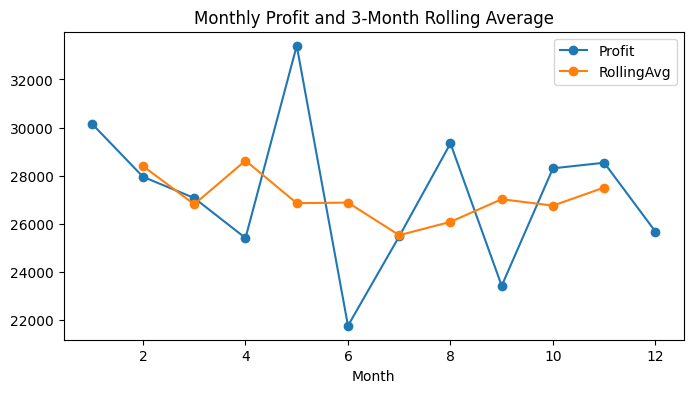

In [33]:
# Aggregate monthly total profit
monthly_profit = (
    orders.groupby('Month')['Profit']
    .sum()
    .reset_index()
    .sort_values('Month')
)

# Add 3-month rolling average for trend smoothing
monthly_profit['RollingAvg'] = (
    monthly_profit['Profit']
    .rolling(window=3, center=True)
    .mean()
)

# Visualize trend
monthly_profit.plot(
    x='Month', y=['Profit', 'RollingAvg'],
    kind='line', marker='o', figsize=(8,4),
    title='Monthly Profit and 3-Month Rolling Average'
)

In [34]:
############# Categorical Analysis   ######

<Axes: title={'center': 'Average Profit by Product Category'}, ylabel='ProductCategory'>

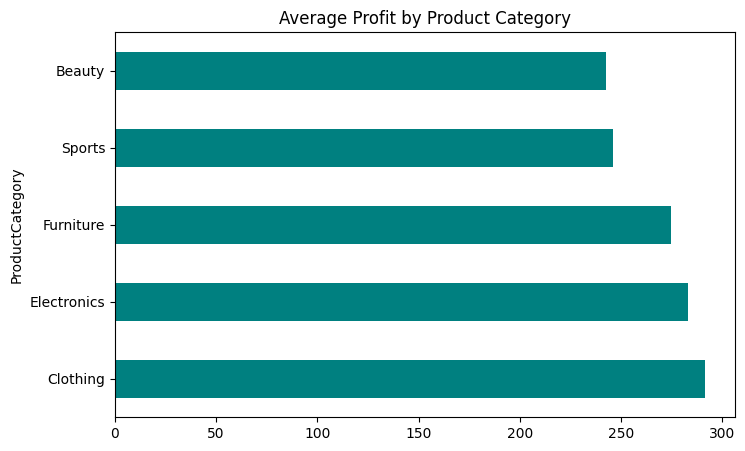

In [35]:
# Group by ProductCategory and calculate key KPIs
category_summary = (
    orders.groupby('ProductCategory')
    .agg({
        'GrossSales': 'mean',
        'Profit': 'mean',
        'ROI': 'mean'
    })
    .round(2)
    .sort_values('Profit', ascending=False)
)

# Visualize top categories
category_summary['Profit'].plot(
    kind='barh',
    figsize=(8,5),
    color='teal',
    title='Average Profit by Product Category'
)


In [36]:
############# Data Integration & Joins   ######

In [37]:
############# Join Datasets ######

In [38]:
# Derive Year/Month from OrderDate to match targets’ grain
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')
orders['Year']  = orders['OrderDate'].dt.year
orders['Month'] = orders['OrderDate'].dt.month

# Aggregate ACTUALS at Year–Month–Region–Channel level
actuals = (
    orders.groupby(['Year','Month','Region','Channel'], as_index=False)
          .agg({'NetSales':'sum', 'Profit':'sum'})
)

#  Merge with TARGETS on the same keys
regional_performance = (
    actuals.merge(
        targets[['Year','Month','Region','Channel','TargetRevenue','TargetProfit']],
        on=['Year','Month','Region','Channel'], how='left'
    )
)

# Variances (Actual – Target)
regional_performance['SalesVariance']  = regional_performance['NetSales'] - regional_performance['TargetRevenue']
regional_performance['ProfitVariance'] = regional_performance['Profit']   - regional_performance['TargetProfit']

#  Nice formatting for display/export
regional_performance = regional_performance.round(2)

regional_performance.head(12)

,Year,Month,Region,Channel,NetSales,Profit,TargetRevenue,TargetProfit,SalesVariance,ProfitVariance
0,2023,1,East,Online,6353.64,2251.40,280811.59,36160.21,-274457.95,-33908.81
1,2023,1,East,Partner,2857.99,861.72,213760.38,40573.20,-210902.39,-39711.48
2,2023,1,East,Store,7248.40,1878.97,295059.93,54608.76,-287811.53,-52729.79
3,2023,1,North,Online,3272.71,996.43,235708.93,30695.78,-232436.22,-29699.35
4,2023,1,North,Store,5006.69,1659.92,242930.64,40157.18,-237923.95,-38497.26
5,2023,1,South,Online,3339.26,1103.90,116675.32,16097.64,-113336.06,-14993.74
6,2023,1,South,Partner,661.16,181.14,177863.86,41002.41,-177202.70,-40821.27
7,2023,1,South,Store,1409.39,422.56,216762.75,28630.81,-215353.36,-28208.25
8,2023,1,West,Online,3519.52,1272.44,256610.83,38872.46,-253091.31,-37600.02
9,2023,1,West,Partner,4881.89,1407.21,118971.24,24460.00,-114089.35,-23052.79


In [39]:
############# Hierarchical Indexing  ######

In [40]:
########## Hierarchical Indexing ##########

#  Ensure Month exists and ROI is safe
#orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')
#orders['Month'] = orders['OrderDate'].dt.month

# Avoid division warnings and NaNs/Infs
#orders['ROI'] = (orders['Profit'].replace(0, pd.NA) /
#                 orders['NetSales'].replace(0, pd.NA))
#orders['ROI'] = orders['ROI'].astype(float).clip(lower=-10, upper=10).fillna(0).round(2)

#   MultiIndex by Region & Month (index produced by groupby)
hier_df = (
    orders.groupby(['Region', 'Month'])
          .agg({'NetSales': 'sum', 'Profit': 'sum', 'ROI': 'mean'})
          .round(2)
)

print(hier_df.head(10))  # preview



              NetSales    Profit   ROI
Region Month                          
East   1      33743.87  10994.33  0.50
       2      15563.88   4735.96  0.47
       3      19336.85   6335.20  0.49
       4      14924.17   5149.36  0.50
       5      26854.83   8625.33  0.49
       6      21119.36   7042.87  0.54
       7      21669.42   7518.99  0.54
       8      26782.29   8433.78  0.45
       9      21234.86   6926.89  0.47
       10     20696.16   6737.47  0.50


In [41]:
#   Advanced slicing with .loc on MultiIndex
south_data = hier_df.loc['South']               # all months for South
print("\nSouth Region Summary:\n", south_data)

south_march = hier_df.loc[('South', 3)]         # specific Region–Month
print("\nSouth - March Performance:\n", south_march)


South Region Summary:
        NetSales   Profit   ROI
Month                         
1      14854.26  5024.25  0.48
2      18327.00  5582.51  0.47
3      15121.65  4910.84  0.49
4      17208.66  5893.55  0.56
5      26472.77  8440.32  0.48
6      17433.41  5504.83  0.46
7      17787.16  6053.66  0.51
8      18946.74  6373.55  0.55
9      17066.43  5390.14  0.45
10     28350.68  9118.42  0.50
11     17923.80  6070.40  0.49
12     25769.94  8245.95  0.53

South - March Performance:
 NetSales    15121.65
Profit       4910.84
ROI             0.49
Name: (South, 3), dtype: float64


In [42]:
#  Optional: reshape for visualization (slide’s .unstack() demo)
profit_pivot = hier_df['Profit'].unstack('Month')  # rows=Region, cols=Month
print("\nProfit by Region × Month (wide):\n", profit_pivot.round(0).head())



Profit by Region × Month (wide):
 Month        1       2       3       4       5       6       7       8   \
Region                                                                    
East    10994.0  4736.0  6335.0  5149.0  8625.0  7043.0  7519.0  8434.0   
North    6867.0  9735.0  6315.0  6895.0  7844.0  4750.0  7257.0  8824.0   
South    5024.0  5583.0  4911.0  5894.0  8440.0  5505.0  6054.0  6374.0   
West     7282.0  7899.0  9509.0  7470.0  8494.0  4463.0  4647.0  5710.0   

Month       9       10      11      12  
Region                                  
East    6927.0  6737.0  6826.0  5736.0  
North   5499.0  3504.0  8663.0  6249.0  
South   5390.0  9118.0  6070.0  8246.0  
West    5603.0  8946.0  6980.0  5444.0  


In [43]:
############# Apply & Lambda ######

In [44]:
# Classify ROI into business-friendly categories
orders['ROIBand'] = orders['ROI'].apply(
    lambda x: 'Low' if x < 0.45 
              else 'Medium' if x <= 0.55 
              else 'High'
)

# Verify transformation
orders[['ROI', 'ROIBand']].head(10)

# Count how many records fall into each ROI Band
orders['ROIBand'].value_counts()

ROIBand
Low       517
High      453
Medium    230
Name: count, dtype: int64

In [45]:
############# Data Integration & Joins   ######

In [46]:
#############  Summary DataFrames    ######

In [47]:
# Enrich orders with LoyaltyStatus
orders_enriched = orders.merge(
    customers[['CustomerID', 'LoyaltyStatus']],
    on='CustomerID',
    how='left'
)

# Optional: fill missing segment labels
orders_enriched['LoyaltyStatus'] = orders_enriched['LoyaltyStatus'].fillna('Unknown')

#  Summary by Region × Channel × LoyaltyStatus
summary_df = (
    orders_enriched
      .groupby(['Region', 'Channel', 'LoyaltyStatus'], as_index=False)
      .agg({
          'NetSales': 'sum',
          'Profit': 'sum',
          'ROI': 'mean',
          'OrderID': 'count'   # volume proxy
      })
      .rename(columns={'OrderID': 'OrderCount'})
      .round(2)
      .sort_values(['Region','Channel','Profit'], ascending=[True, True, False])
)

print(summary_df.head(10))


   Region  Channel LoyaltyStatus  NetSales    Profit   ROI  OrderCount
2    East   Online        Silver  52146.14  17038.48  0.51          67
0    East   Online        Bronze  31317.72  10378.30  0.48          33
1    East   Online          Gold  28005.68   9344.73  0.52          38
5    East  Partner        Silver  16918.44   6022.85  0.56          22
3    East  Partner        Bronze  15712.38   5039.28  0.51          17
4    East  Partner          Gold   2640.89    878.84  0.51           6
8    East    Store        Silver  55349.01  18053.60  0.48          72
6    East    Store        Bronze  40124.54  13138.04  0.51          42
7    East    Store          Gold  17529.65   5167.87  0.45          29
11  North   Online        Silver  49004.24  15879.28  0.51          66


In [48]:
############# Export   ######

In [49]:
# Export multiple DataFrames into a single Excel workbook
with pd.ExcelWriter('Monthly_Report.xlsx') as writer:
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    region_channel_summary.to_excel(writer, sheet_name='RegionChannel', index=False)
    month_summary.to_excel(writer, sheet_name='MonthlyTrends', index=False)
    category_summary.to_excel(writer, sheet_name='CategoryPerformance', index=False)

print("Excel export complete → 'Monthly_Report.xlsx'")

Excel export complete → 'Monthly_Report.xlsx'


In [50]:
# Export summary DataFrame to CSV
summary_df.to_csv('Summary_Report.csv', index=False)
print("CSV export complete → 'Summary_Report.csv'")

CSV export complete → 'Summary_Report.csv'


In [51]:
#############  Mini Visualization    ######

Text(0, 0.5, 'Total Profit')

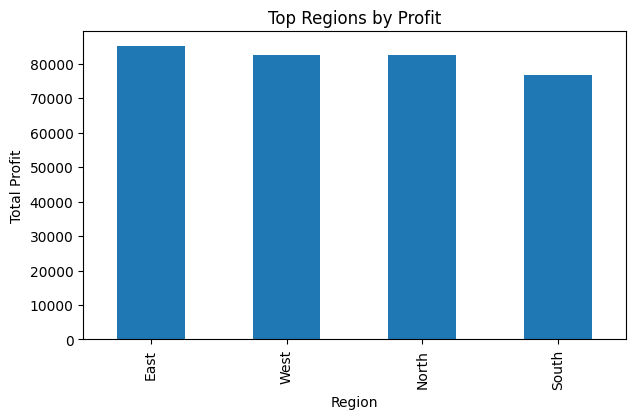

In [52]:
#   Aggregate total Profit by Region
top_regions = (
    orders.groupby('Region')['Profit']
    .sum()
    .sort_values(ascending=False)
)

#   (Optional) keep top-5 only
top5_regions = top_regions.head(5)

# Quick bar chart
ax = top5_regions.plot(
    kind='bar',
    figsize=(7,4),
    title='Top Regions by Profit'
)
ax.set_xlabel('Region')
ax.set_ylabel('Total Profit')


In [53]:
########## Demonstration ###########

In [54]:
########## Data Preparation (Pandas) ###########

In [55]:
import pandas as pd

# Load datasets
finance = pd.read_csv('../data/finance_performance.csv')
sales = pd.read_csv('../data/regional_sales.csv')

# Merge on common keys: Region + Month
merged_df = pd.merge(finance, sales, on=['Region', 'Month'], how='inner')

# Compute derived metrics
merged_df['NetProfit'] = merged_df['Revenue'] - merged_df['Marketing_Spend'] - merged_df['Operational_Cost']
merged_df['ROI_Calc'] = (merged_df['NetProfit'] / merged_df['Marketing_Spend']).round(2)

# Inspect
print(merged_df.head())


   Month Region  Revenue  Marketing_Spend  Operational_Cost  Channel  Profit  \
0      1  North    21000             4000              8000   Online    4500   
1      1  North    21000             4000              8000   Retail    5200   
2      1  North    21000             4000              8000  Partner    4800   
3      2  North    24000             4500              8500   Online    5000   
4      2  North    24000             4500              8500   Retail    5400   

    ROI  NetProfit  ROI_Calc  
0  0.15       9000      2.25  
1  0.18       9000      2.25  
2  0.16       9000      2.25  
3  0.17      11000      2.44  
4  0.19      11000      2.44  


In [56]:
########## Numeric Analysis (NumPy) ###########

In [57]:
import numpy as np

# Convert key numeric columns into NumPy arrays
revenue_arr = merged_df['Revenue'].values
spend_arr = merged_df['Marketing_Spend'].values
roi_arr = merged_df['ROI_Calc'].values

# Quick numeric stats
avg_roi = np.mean(roi_arr)
max_roi = np.max(roi_arr)
roi_diff = np.diff(roi_arr)  # month-to-month change
high_roi_mask = roi_arr > 0.15  # ROI > 15%

print(f"Average ROI: {avg_roi:.2f}")
print(f"Max ROI: {max_roi:.2f}")
print("Month-over-month ROI change:", roi_diff)
print("High ROI months:", np.sum(high_roi_mask))


Average ROI: 2.37
Max ROI: 2.68
Month-over-month ROI change: [ 0.    0.    0.19  0.    0.    0.08  0.    0.   -0.63  0.    0.    0.23
  0.    0.    0.26  0.    0.   -0.18  0.    0.    0.17  0.    0.    0.27
  0.    0.   -0.27  0.    0.    0.25  0.    0.    0.06  0.    0.  ]
High ROI months: 36


In [58]:
########## Statistical Insights (SciPy) ###########

In [59]:
from scipy import stats

# 1. Correlation test between marketing spend and revenue
corr, p_value_corr = stats.pearsonr(merged_df['Marketing_Spend'], merged_df['Revenue'])
print(f"Correlation between Marketing Spend and Revenue: {corr:.3f} (p={p_value_corr:.3f})")

# 2. T-test: ROI comparison between Online and Retail channels
roi_online = merged_df.loc[merged_df['Channel'] == 'Online', 'ROI_Calc']
roi_retail = merged_df.loc[merged_df['Channel'] == 'Retail', 'ROI_Calc']

t_stat, p_val_ttest = stats.ttest_ind(roi_online, roi_retail, equal_var=False)
print(f"T-test (Online vs Retail ROI): t={t_stat:.3f}, p={p_val_ttest:.3f}")


Correlation between Marketing Spend and Revenue: 0.945 (p=0.000)
T-test (Online vs Retail ROI): t=0.000, p=1.000


In [60]:
########## Trend & Optimization (SciPy Signal + Optimize) ###########

In [61]:
from scipy.signal import savgol_filter
from scipy.optimize import minimize

# Smooth ROI trend
roi_smoothed = savgol_filter(merged_df['ROI_Calc'], window_length=5, polyorder=2)

# Define ROI optimization function (negative for minimization)
def negative_roi(spend):
    predicted_profit = 0.0005 * spend**2 - 0.2 * spend + 5000  # simplified model
    return -predicted_profit / spend

# Find spend that maximizes ROI
opt_result = minimize(negative_roi, x0=[10000], bounds=[(1000, 20000)])
optimal_spend = opt_result.x[0]
print(f"Optimal Marketing Spend ≈ €{optimal_spend:.0f}")


Optimal Marketing Spend ≈ €20000


In [62]:
########## Final Summary Dashboard (Pandas + Matplotlib) ###########

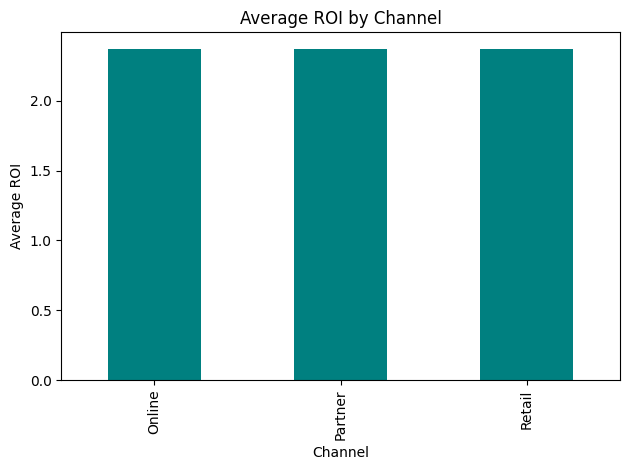

Final BI Report exported successfully.


In [63]:
import matplotlib.pyplot as plt

# Group by Region & Channel
summary = (
    merged_df.groupby(['Region', 'Channel'])
    .agg({'Revenue': 'sum', 'Profit': 'sum', 'ROI_Calc': 'mean'})
    .round(2)
    .reset_index()
)

# Plot ROI by Channel
summary.groupby('Channel')['ROI_Calc'].mean().plot(kind='bar', title='Average ROI by Channel', color='teal')
plt.xlabel('Channel')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()

# Export summary to Excel
summary.to_excel('Final_BI_Report.xlsx', index=False)
print("Final BI Report exported successfully.")
